In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -----------------------------
# 1. Data Preprocessing (Single Action Class)
# -----------------------------
base_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"  # base Task_B folder

action_class = "Fielding"  # Change to "Bowling" / "Fielding" / "Umpire"

transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Point ImageFolder to *only* the action class folder
train_ds = datasets.ImageFolder(f"{base_dir}/train/{action_class}", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/{action_class}", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/{action_class}", transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

print(f"Training only on: {action_class}")
print("Train classes:", train_ds.classes)
print("Train samples:", len(train_ds), 
      "Val samples:", len(val_ds), 
      "Test samples:", len(test_ds))


Training only on: Fielding
Train classes: ['boundary_save', 'catching_a_ball', 'diving_stop', 'run_out', 'stumping']
Train samples: 1917 Val samples: 504 Test samples: 630


In [2]:
print("Total training images:", len(train_ds))
print("Total validation images:", len(val_ds))
print("Total test images:", len(test_ds))

total_images = len(train_ds) + len(val_ds) + len(test_ds)
print("Total images in dataset:", total_images)

Total training images: 1917
Total validation images: 504
Total test images: 630
Total images in dataset: 3051


In [3]:
ignore_folder = "random_occlusion"

def count_images_ignore_folder(dataset, ignore_folder):
    count = 0
    for img_path, label in dataset.samples:
        # Skip if the image path contains the ignore_folder
        if ignore_folder not in img_path.split("/"):
            count += 1
    return count

train_count = count_images_ignore_folder(train_ds, ignore_folder)
val_count   = count_images_ignore_folder(val_ds, ignore_folder)
test_count  = count_images_ignore_folder(test_ds, ignore_folder)

total_count = train_count + val_count + test_count

print("Training images (excluding '{}'): {}".format(ignore_folder, train_count))
print("Validation images (excluding '{}'): {}".format(ignore_folder, val_count))
print("Test images (excluding '{}'): {}".format(ignore_folder, test_count))
print("Total images (excluding '{}'): {}".format(ignore_folder, total_count))

Training images (excluding 'random_occlusion'): 1704
Validation images (excluding 'random_occlusion'): 448
Test images (excluding 'random_occlusion'): 560
Total images (excluding 'random_occlusion'): 2712


In [4]:
ignore_folder = "random_occlusionw"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'blur', 'low_resolution', 'motion_blur', 'random_occlusion', 'original', 'chromatic_aberration', 'lens_flare', 'gaussian_noise', 'dirty_lens'}
Validation folders considered: {'blur', 'low_resolution', 'motion_blur', 'random_occlusion', 'original', 'chromatic_aberration', 'lens_flare', 'gaussian_noise', 'dirty_lens'}
Test folders considered: {'blur', 'low_resolution', 'motion_blur', 'random_occlusion', 'original', 'chromatic_aberration', 'lens_flare', 'gaussian_noise', 'dirty_lens'}


In [5]:
ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    # Keep only samples where ignore_folder is NOT in the path
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]  # Update targets accordingly
    return dataset

# Create original datasets
train_ds = datasets.ImageFolder(f"{base_dir}/train/Fielding", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Fielding", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Fielding", transform=transform)

# Filter out 'random_occlusion' folder
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Classes (will remain the same)
classes = train_ds.classes
print("Classes:", classes)

# Show counts
print("Final Training images:", len(train_ds))
print("Final Validation images:", len(val_ds))
print("Final Test images:", len(test_ds))
print("Total images after filtering:", len(train_ds) + len(val_ds) + len(test_ds))

Classes: ['boundary_save', 'catching_a_ball', 'diving_stop', 'run_out', 'stumping']
Final Training images: 1704
Final Validation images: 448
Final Test images: 560
Total images after filtering: 2712


In [6]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'blur', 'low_resolution', 'motion_blur', 'original', 'chromatic_aberration', 'lens_flare', 'gaussian_noise', 'dirty_lens'}
Validation folders considered: {'blur', 'low_resolution', 'motion_blur', 'original', 'chromatic_aberration', 'lens_flare', 'gaussian_noise', 'dirty_lens'}
Test folders considered: {'blur', 'low_resolution', 'motion_blur', 'original', 'chromatic_aberration', 'lens_flare', 'gaussian_noise', 'dirty_lens'}


In [7]:
import seaborn as sns
import numpy as np
import time
from tqdm import tqdm
import torch
import torch.nn as nn
import torchvision.models as models

In [8]:
# -----------------------------
# 2. Pretrained ResNet50 Model
# -----------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load pretrained ResNet50
print("🔄 Loading pretrained ResNet50 from ImageNet...")
model = models.resnet50(pretrained=True)

# Replace final classification layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(classes))
model = model.to(device)

print(f"✅ Model loaded with {len(classes)} output classes")
print(f"📊 Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"📊 Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

# Model summary
try:
    summary(model, (3, 224, 224))
except:
    print("Model summary not available")

Using device: cuda
🔄 Loading pretrained ResNet50 from ImageNet...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 189MB/s]


✅ Model loaded with 5 output classes
📊 Total parameters: 23,518,277
📊 Trainable parameters: 23,518,277
Model summary not available



📋 Training Configuration:
│ Optimizer: Adam (lr=0.0001)
│ Loss Function: CrossEntropyLoss
│ Batch Size: 32
│ Device: cuda

🚀 Starting Fine-tuning for 50 epochs...

📈 Epoch 1/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:36<00:00,  1.50it/s, Loss=0.4855, Acc=0.8351]


✅ Training completed in 36.04s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:05<00:00,  2.57it/s, Loss=0.9248, Acc=0.6585]


✅ Validation completed in 5.46s
🌟 New best model found! Validation Loss: 0.9248

📊 Epoch 1 Summary:
│ Train Loss: 0.4855 | Train Acc: 0.8351
│ Val Loss:   0.9248 | Val Acc:   0.6585
│ Train Time: 36.04s | Val Time: 5.46s
│ Total Epoch Time: 41.51s
│ Best Val Loss: 0.9248 (Epoch 1)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 2/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:27<00:00,  1.95it/s, Loss=0.0325, Acc=0.9941]


✅ Training completed in 27.69s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.59it/s, Loss=1.1811, Acc=0.6518]


✅ Validation completed in 3.91s

📊 Epoch 2 Summary:
│ Train Loss: 0.0325 | Train Acc: 0.9941
│ Val Loss:   1.1811 | Val Acc:   0.6518
│ Train Time: 27.69s | Val Time: 3.91s
│ Total Epoch Time: 31.60s
│ Best Val Loss: 0.9248 (Epoch 1)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 3/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:27<00:00,  1.94it/s, Loss=0.0245, Acc=0.9941]


✅ Training completed in 27.85s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.68it/s, Loss=1.0263, Acc=0.6295]


✅ Validation completed in 3.80s

📊 Epoch 3 Summary:
│ Train Loss: 0.0245 | Train Acc: 0.9941
│ Val Loss:   1.0263 | Val Acc:   0.6295
│ Train Time: 27.85s | Val Time: 3.80s
│ Total Epoch Time: 31.66s
│ Best Val Loss: 0.9248 (Epoch 1)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 4/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:27<00:00,  1.93it/s, Loss=0.0256, Acc=0.9953]


✅ Training completed in 27.97s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.64it/s, Loss=1.3472, Acc=0.6295]


✅ Validation completed in 3.85s

📊 Epoch 4 Summary:
│ Train Loss: 0.0256 | Train Acc: 0.9953
│ Val Loss:   1.3472 | Val Acc:   0.6295
│ Train Time: 27.97s | Val Time: 3.85s
│ Total Epoch Time: 31.82s
│ Best Val Loss: 0.9248 (Epoch 1)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 5/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.92it/s, Loss=0.0469, Acc=0.9877]


✅ Training completed in 28.09s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.65it/s, Loss=1.0641, Acc=0.6808]


✅ Validation completed in 3.84s

📊 Epoch 5 Summary:
│ Train Loss: 0.0469 | Train Acc: 0.9877
│ Val Loss:   1.0641 | Val Acc:   0.6808
│ Train Time: 28.09s | Val Time: 3.84s
│ Total Epoch Time: 31.94s
│ Best Val Loss: 0.9248 (Epoch 1)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 6/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.92it/s, Loss=0.0108, Acc=0.9977]


✅ Training completed in 28.11s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.70it/s, Loss=0.9935, Acc=0.6674]


✅ Validation completed in 3.78s

📊 Epoch 6 Summary:
│ Train Loss: 0.0108 | Train Acc: 0.9977
│ Val Loss:   0.9935 | Val Acc:   0.6674
│ Train Time: 28.11s | Val Time: 3.78s
│ Total Epoch Time: 31.89s
│ Best Val Loss: 0.9248 (Epoch 1)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 7/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.92it/s, Loss=0.0111, Acc=0.9994]


✅ Training completed in 28.20s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.66it/s, Loss=1.1824, Acc=0.6808]


✅ Validation completed in 3.83s

📊 Epoch 7 Summary:
│ Train Loss: 0.0111 | Train Acc: 0.9994
│ Val Loss:   1.1824 | Val Acc:   0.6808
│ Train Time: 28.20s | Val Time: 3.83s
│ Total Epoch Time: 32.03s
│ Best Val Loss: 0.9248 (Epoch 1)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 8/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.91it/s, Loss=0.0232, Acc=0.9941]


✅ Training completed in 28.25s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.68it/s, Loss=1.2053, Acc=0.6406]


✅ Validation completed in 3.81s

📊 Epoch 8 Summary:
│ Train Loss: 0.0232 | Train Acc: 0.9941
│ Val Loss:   1.2053 | Val Acc:   0.6406
│ Train Time: 28.25s | Val Time: 3.81s
│ Total Epoch Time: 32.06s
│ Best Val Loss: 0.9248 (Epoch 1)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 9/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.91it/s, Loss=0.0137, Acc=0.9977]


✅ Training completed in 28.34s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.60it/s, Loss=0.9919, Acc=0.6897]


✅ Validation completed in 3.90s

📊 Epoch 9 Summary:
│ Train Loss: 0.0137 | Train Acc: 0.9977
│ Val Loss:   0.9919 | Val Acc:   0.6897
│ Train Time: 28.34s | Val Time: 3.90s
│ Total Epoch Time: 32.24s
│ Best Val Loss: 0.9248 (Epoch 1)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 10/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.89it/s, Loss=0.0170, Acc=0.9947]


✅ Training completed in 28.54s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.68it/s, Loss=0.9070, Acc=0.7254]


✅ Validation completed in 3.81s
🌟 New best model found! Validation Loss: 0.9070

📊 Epoch 10 Summary:
│ Train Loss: 0.0170 | Train Acc: 0.9947
│ Val Loss:   0.9070 | Val Acc:   0.7254
│ Train Time: 28.54s | Val Time: 3.81s
│ Total Epoch Time: 32.35s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 11/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.90it/s, Loss=0.0262, Acc=0.9930]


✅ Training completed in 28.48s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.51it/s, Loss=1.2582, Acc=0.6719]


✅ Validation completed in 4.00s

📊 Epoch 11 Summary:
│ Train Loss: 0.0262 | Train Acc: 0.9930
│ Val Loss:   1.2582 | Val Acc:   0.6719
│ Train Time: 28.48s | Val Time: 4.00s
│ Total Epoch Time: 32.48s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 12/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.90it/s, Loss=0.0345, Acc=0.9912]


✅ Training completed in 28.40s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.69it/s, Loss=1.0573, Acc=0.6362]


✅ Validation completed in 3.81s

📊 Epoch 12 Summary:
│ Train Loss: 0.0345 | Train Acc: 0.9912
│ Val Loss:   1.0573 | Val Acc:   0.6362
│ Train Time: 28.40s | Val Time: 3.81s
│ Total Epoch Time: 32.21s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 13/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.90it/s, Loss=0.0087, Acc=0.9977]


✅ Training completed in 28.40s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.52it/s, Loss=1.3143, Acc=0.6496]


✅ Validation completed in 3.98s

📊 Epoch 13 Summary:
│ Train Loss: 0.0087 | Train Acc: 0.9977
│ Val Loss:   1.3143 | Val Acc:   0.6496
│ Train Time: 28.40s | Val Time: 3.98s
│ Total Epoch Time: 32.39s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 14/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.90it/s, Loss=0.0094, Acc=0.9982]


✅ Training completed in 28.39s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.60it/s, Loss=1.1210, Acc=0.6875]


✅ Validation completed in 3.90s

📊 Epoch 14 Summary:
│ Train Loss: 0.0094 | Train Acc: 0.9982
│ Val Loss:   1.1210 | Val Acc:   0.6875
│ Train Time: 28.39s | Val Time: 3.90s
│ Total Epoch Time: 32.30s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 15/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.89it/s, Loss=0.0379, Acc=0.9883]


✅ Training completed in 28.55s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.62it/s, Loss=1.3243, Acc=0.6295]


✅ Validation completed in 3.87s

📊 Epoch 15 Summary:
│ Train Loss: 0.0379 | Train Acc: 0.9883
│ Val Loss:   1.3243 | Val Acc:   0.6295
│ Train Time: 28.55s | Val Time: 3.87s
│ Total Epoch Time: 32.43s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 16/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.91it/s, Loss=0.0429, Acc=0.9894]


✅ Training completed in 28.30s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.56it/s, Loss=1.3615, Acc=0.6339]


✅ Validation completed in 3.93s

📊 Epoch 16 Summary:
│ Train Loss: 0.0429 | Train Acc: 0.9894
│ Val Loss:   1.3615 | Val Acc:   0.6339
│ Train Time: 28.30s | Val Time: 3.93s
│ Total Epoch Time: 32.24s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 17/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.86it/s, Loss=0.0451, Acc=0.9877]


✅ Training completed in 29.08s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.61it/s, Loss=1.1019, Acc=0.6786]


✅ Validation completed in 3.89s

📊 Epoch 17 Summary:
│ Train Loss: 0.0451 | Train Acc: 0.9877
│ Val Loss:   1.1019 | Val Acc:   0.6786
│ Train Time: 29.08s | Val Time: 3.89s
│ Total Epoch Time: 32.98s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 18/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.89it/s, Loss=0.0342, Acc=0.9924]


✅ Training completed in 28.53s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.65it/s, Loss=1.2504, Acc=0.6629]


✅ Validation completed in 3.84s

📊 Epoch 18 Summary:
│ Train Loss: 0.0342 | Train Acc: 0.9924
│ Val Loss:   1.2504 | Val Acc:   0.6629
│ Train Time: 28.53s | Val Time: 3.84s
│ Total Epoch Time: 32.37s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 19/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.88it/s, Loss=0.0295, Acc=0.9877]


✅ Training completed in 28.71s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.63it/s, Loss=1.3660, Acc=0.6585]


✅ Validation completed in 3.87s

📊 Epoch 19 Summary:
│ Train Loss: 0.0295 | Train Acc: 0.9877
│ Val Loss:   1.3660 | Val Acc:   0.6585
│ Train Time: 28.71s | Val Time: 3.87s
│ Total Epoch Time: 32.58s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 20/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.87it/s, Loss=0.0264, Acc=0.9977]


✅ Training completed in 28.92s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.62it/s, Loss=1.2905, Acc=0.6429]


✅ Validation completed in 3.88s

📊 Epoch 20 Summary:
│ Train Loss: 0.0264 | Train Acc: 0.9977
│ Val Loss:   1.2905 | Val Acc:   0.6429
│ Train Time: 28.92s | Val Time: 3.88s
│ Total Epoch Time: 32.80s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 21/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.90it/s, Loss=0.0231, Acc=0.9912]


✅ Training completed in 28.48s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.49it/s, Loss=1.3638, Acc=0.6339]


✅ Validation completed in 4.02s

📊 Epoch 21 Summary:
│ Train Loss: 0.0231 | Train Acc: 0.9912
│ Val Loss:   1.3638 | Val Acc:   0.6339
│ Train Time: 28.48s | Val Time: 4.02s
│ Total Epoch Time: 32.51s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 22/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.88it/s, Loss=0.0062, Acc=0.9994]


✅ Training completed in 28.72s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.59it/s, Loss=1.4035, Acc=0.6116]


✅ Validation completed in 3.91s

📊 Epoch 22 Summary:
│ Train Loss: 0.0062 | Train Acc: 0.9994
│ Val Loss:   1.4035 | Val Acc:   0.6116
│ Train Time: 28.72s | Val Time: 3.91s
│ Total Epoch Time: 32.63s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 23/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.87it/s, Loss=0.0134, Acc=0.9959]


✅ Training completed in 28.85s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.51it/s, Loss=1.5158, Acc=0.6406]


✅ Validation completed in 4.00s

📊 Epoch 23 Summary:
│ Train Loss: 0.0134 | Train Acc: 0.9959
│ Val Loss:   1.5158 | Val Acc:   0.6406
│ Train Time: 28.85s | Val Time: 4.00s
│ Total Epoch Time: 32.85s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 24/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.87it/s, Loss=0.0230, Acc=0.9935]


✅ Training completed in 28.82s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.57it/s, Loss=1.8340, Acc=0.6071]


✅ Validation completed in 3.93s

📊 Epoch 24 Summary:
│ Train Loss: 0.0230 | Train Acc: 0.9935
│ Val Loss:   1.8340 | Val Acc:   0.6071
│ Train Time: 28.82s | Val Time: 3.93s
│ Total Epoch Time: 32.75s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 25/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.85it/s, Loss=0.0080, Acc=0.9965]


✅ Training completed in 29.13s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.58it/s, Loss=1.5009, Acc=0.6696]


✅ Validation completed in 3.91s

📊 Epoch 25 Summary:
│ Train Loss: 0.0080 | Train Acc: 0.9965
│ Val Loss:   1.5009 | Val Acc:   0.6696
│ Train Time: 29.13s | Val Time: 3.91s
│ Total Epoch Time: 33.04s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 26/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.84it/s, Loss=0.0051, Acc=0.9994]


✅ Training completed in 29.30s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.62it/s, Loss=1.2854, Acc=0.6674]


✅ Validation completed in 3.87s

📊 Epoch 26 Summary:
│ Train Loss: 0.0051 | Train Acc: 0.9994
│ Val Loss:   1.2854 | Val Acc:   0.6674
│ Train Time: 29.30s | Val Time: 3.87s
│ Total Epoch Time: 33.17s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 27/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.85it/s, Loss=0.0143, Acc=0.9947]


✅ Training completed in 29.21s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.54it/s, Loss=1.5719, Acc=0.6585]


✅ Validation completed in 3.96s

📊 Epoch 27 Summary:
│ Train Loss: 0.0143 | Train Acc: 0.9947
│ Val Loss:   1.5719 | Val Acc:   0.6585
│ Train Time: 29.21s | Val Time: 3.96s
│ Total Epoch Time: 33.17s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 28/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0067, Acc=0.9994]


✅ Training completed in 29.70s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.47it/s, Loss=1.5813, Acc=0.6451]


✅ Validation completed in 4.03s

📊 Epoch 28 Summary:
│ Train Loss: 0.0067 | Train Acc: 0.9994
│ Val Loss:   1.5813 | Val Acc:   0.6451
│ Train Time: 29.70s | Val Time: 4.03s
│ Total Epoch Time: 33.74s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 29/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.83it/s, Loss=0.0207, Acc=0.9935]


✅ Training completed in 29.54s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.56it/s, Loss=1.6975, Acc=0.6317]


✅ Validation completed in 3.93s

📊 Epoch 29 Summary:
│ Train Loss: 0.0207 | Train Acc: 0.9935
│ Val Loss:   1.6975 | Val Acc:   0.6317
│ Train Time: 29.54s | Val Time: 3.93s
│ Total Epoch Time: 33.48s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 30/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0116, Acc=0.9971]


✅ Training completed in 29.61s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.51it/s, Loss=1.5537, Acc=0.6362]


✅ Validation completed in 4.00s

📊 Epoch 30 Summary:
│ Train Loss: 0.0116 | Train Acc: 0.9971
│ Val Loss:   1.5537 | Val Acc:   0.6362
│ Train Time: 29.61s | Val Time: 4.00s
│ Total Epoch Time: 33.62s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 31/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0017, Acc=1.0000]


✅ Training completed in 29.62s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.51it/s, Loss=1.4240, Acc=0.6540]


✅ Validation completed in 3.99s

📊 Epoch 31 Summary:
│ Train Loss: 0.0017 | Train Acc: 1.0000
│ Val Loss:   1.4240 | Val Acc:   0.6540
│ Train Time: 29.62s | Val Time: 3.99s
│ Total Epoch Time: 33.61s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 32/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.80it/s, Loss=0.0023, Acc=0.9988]


✅ Training completed in 29.92s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.57it/s, Loss=1.4831, Acc=0.6384]


✅ Validation completed in 3.93s

📊 Epoch 32 Summary:
│ Train Loss: 0.0023 | Train Acc: 0.9988
│ Val Loss:   1.4831 | Val Acc:   0.6384
│ Train Time: 29.92s | Val Time: 3.93s
│ Total Epoch Time: 33.86s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 33/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0027, Acc=0.9994]


✅ Training completed in 29.70s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.29it/s, Loss=1.4354, Acc=0.6719]


✅ Validation completed in 4.27s

📊 Epoch 33 Summary:
│ Train Loss: 0.0027 | Train Acc: 0.9994
│ Val Loss:   1.4354 | Val Acc:   0.6719
│ Train Time: 29.70s | Val Time: 4.27s
│ Total Epoch Time: 33.97s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 34/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0011, Acc=1.0000]


✅ Training completed in 29.66s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.48it/s, Loss=1.4297, Acc=0.6473]


✅ Validation completed in 4.02s

📊 Epoch 34 Summary:
│ Train Loss: 0.0011 | Train Acc: 1.0000
│ Val Loss:   1.4297 | Val Acc:   0.6473
│ Train Time: 29.66s | Val Time: 4.02s
│ Total Epoch Time: 33.69s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 35/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0006, Acc=1.0000]


✅ Training completed in 29.67s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.49it/s, Loss=1.5665, Acc=0.6920]


✅ Validation completed in 4.02s

📊 Epoch 35 Summary:
│ Train Loss: 0.0006 | Train Acc: 1.0000
│ Val Loss:   1.5665 | Val Acc:   0.6920
│ Train Time: 29.67s | Val Time: 4.02s
│ Total Epoch Time: 33.69s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 36/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0004, Acc=1.0000]


✅ Training completed in 29.62s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.50it/s, Loss=1.5064, Acc=0.6830]


✅ Validation completed in 4.01s

📊 Epoch 36 Summary:
│ Train Loss: 0.0004 | Train Acc: 1.0000
│ Val Loss:   1.5064 | Val Acc:   0.6830
│ Train Time: 29.62s | Val Time: 4.01s
│ Total Epoch Time: 33.63s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 37/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0005, Acc=1.0000]


✅ Training completed in 29.72s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.60it/s, Loss=1.5028, Acc=0.6920]


✅ Validation completed in 3.90s

📊 Epoch 37 Summary:
│ Train Loss: 0.0005 | Train Acc: 1.0000
│ Val Loss:   1.5028 | Val Acc:   0.6920
│ Train Time: 29.72s | Val Time: 3.90s
│ Total Epoch Time: 33.62s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 38/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0013, Acc=1.0000]


✅ Training completed in 29.64s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.62it/s, Loss=1.4551, Acc=0.6808]


✅ Validation completed in 3.88s

📊 Epoch 38 Summary:
│ Train Loss: 0.0013 | Train Acc: 1.0000
│ Val Loss:   1.4551 | Val Acc:   0.6808
│ Train Time: 29.64s | Val Time: 3.88s
│ Total Epoch Time: 33.52s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 39/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.81it/s, Loss=0.0026, Acc=0.9994]


✅ Training completed in 29.79s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.57it/s, Loss=1.5455, Acc=0.6763]


✅ Validation completed in 3.92s

📊 Epoch 39 Summary:
│ Train Loss: 0.0026 | Train Acc: 0.9994
│ Val Loss:   1.5455 | Val Acc:   0.6763
│ Train Time: 29.79s | Val Time: 3.92s
│ Total Epoch Time: 33.72s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 40/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.81it/s, Loss=0.0012, Acc=0.9994]


✅ Training completed in 29.77s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.44it/s, Loss=1.5868, Acc=0.6696]


✅ Validation completed in 4.08s

📊 Epoch 40 Summary:
│ Train Loss: 0.0012 | Train Acc: 0.9994
│ Val Loss:   1.5868 | Val Acc:   0.6696
│ Train Time: 29.77s | Val Time: 4.08s
│ Total Epoch Time: 33.85s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 41/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0006, Acc=1.0000]


✅ Training completed in 29.69s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.56it/s, Loss=1.4814, Acc=0.6853]


✅ Validation completed in 3.94s

📊 Epoch 41 Summary:
│ Train Loss: 0.0006 | Train Acc: 1.0000
│ Val Loss:   1.4814 | Val Acc:   0.6853
│ Train Time: 29.69s | Val Time: 3.94s
│ Total Epoch Time: 33.64s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 42/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:30<00:00,  1.80it/s, Loss=0.0008, Acc=1.0000]


✅ Training completed in 30.07s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.56it/s, Loss=1.5455, Acc=0.6897]


✅ Validation completed in 3.94s

📊 Epoch 42 Summary:
│ Train Loss: 0.0008 | Train Acc: 1.0000
│ Val Loss:   1.5455 | Val Acc:   0.6897
│ Train Time: 30.07s | Val Time: 3.94s
│ Total Epoch Time: 34.02s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 43/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0014, Acc=1.0000]


✅ Training completed in 29.67s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.60it/s, Loss=1.3790, Acc=0.6853]


✅ Validation completed in 3.89s

📊 Epoch 43 Summary:
│ Train Loss: 0.0014 | Train Acc: 1.0000
│ Val Loss:   1.3790 | Val Acc:   0.6853
│ Train Time: 29.67s | Val Time: 3.89s
│ Total Epoch Time: 33.56s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 44/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.82it/s, Loss=0.0015, Acc=1.0000]


✅ Training completed in 29.72s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.53it/s, Loss=1.3894, Acc=0.6875]


✅ Validation completed in 3.98s

📊 Epoch 44 Summary:
│ Train Loss: 0.0015 | Train Acc: 1.0000
│ Val Loss:   1.3894 | Val Acc:   0.6875
│ Train Time: 29.72s | Val Time: 3.98s
│ Total Epoch Time: 33.70s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 45/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.81it/s, Loss=0.0033, Acc=0.9988]


✅ Training completed in 29.84s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:04<00:00,  3.49it/s, Loss=1.4784, Acc=0.6853]


✅ Validation completed in 4.02s

📊 Epoch 45 Summary:
│ Train Loss: 0.0033 | Train Acc: 0.9988
│ Val Loss:   1.4784 | Val Acc:   0.6853
│ Train Time: 29.84s | Val Time: 4.02s
│ Total Epoch Time: 33.86s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 46/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:29<00:00,  1.85it/s, Loss=0.0172, Acc=0.9941]


✅ Training completed in 29.18s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.55it/s, Loss=1.8506, Acc=0.5938]


✅ Validation completed in 3.94s

📊 Epoch 46 Summary:
│ Train Loss: 0.0172 | Train Acc: 0.9941
│ Val Loss:   1.8506 | Val Acc:   0.5938
│ Train Time: 29.18s | Val Time: 3.94s
│ Total Epoch Time: 33.12s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 47/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.87it/s, Loss=0.0121, Acc=0.9959]


✅ Training completed in 28.82s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.55it/s, Loss=1.7769, Acc=0.6094]


✅ Validation completed in 3.94s

📊 Epoch 47 Summary:
│ Train Loss: 0.0121 | Train Acc: 0.9959
│ Val Loss:   1.7769 | Val Acc:   0.6094
│ Train Time: 28.82s | Val Time: 3.94s
│ Total Epoch Time: 32.76s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 48/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.88it/s, Loss=0.0085, Acc=0.9971]


✅ Training completed in 28.74s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.59it/s, Loss=1.6504, Acc=0.6295]


✅ Validation completed in 3.90s

📊 Epoch 48 Summary:
│ Train Loss: 0.0085 | Train Acc: 0.9971
│ Val Loss:   1.6504 | Val Acc:   0.6295
│ Train Time: 28.74s | Val Time: 3.90s
│ Total Epoch Time: 32.64s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 49/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.87it/s, Loss=0.0032, Acc=0.9994]


✅ Training completed in 28.85s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.57it/s, Loss=1.6763, Acc=0.6317]


✅ Validation completed in 3.93s

📊 Epoch 49 Summary:
│ Train Loss: 0.0032 | Train Acc: 0.9994
│ Val Loss:   1.6763 | Val Acc:   0.6317
│ Train Time: 28.85s | Val Time: 3.93s
│ Total Epoch Time: 32.78s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

📈 Epoch 50/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 54/54 [00:28<00:00,  1.88it/s, Loss=0.0011, Acc=1.0000]


✅ Training completed in 28.67s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 14/14 [00:03<00:00,  3.72it/s, Loss=1.6628, Acc=0.6496]


✅ Validation completed in 3.77s

📊 Epoch 50 Summary:
│ Train Loss: 0.0011 | Train Acc: 1.0000
│ Val Loss:   1.6628 | Val Acc:   0.6496
│ Train Time: 28.67s | Val Time: 3.77s
│ Total Epoch Time: 32.44s
│ Best Val Loss: 0.9070 (Epoch 10)
│ GPU Memory: 0.4GB / 3.2GB

💾 Best model saved as 'best_cricket_resnet50.pth'
📊 Best model stats:
│ Best Epoch: 10
│ Best Val Loss: 0.9070
│ Best Val Acc: 0.7254

💾 Training history saved to 'cricket_training_history_resnet50_pretrained.csv'

🎉 Fine-tuning Complete!
Total Training Time: 1654.55s (27.6 minutes)
Average Epoch Time: 33.09s

🧪 Loading Best Model for Testing...
✅ Best model from epoch 10 loaded successfully!


Testing: 100%|██████████████████████████████| 18/18 [00:08<00:00,  2.12it/s]


✅ Testing completed in 8.48s

📋 Classification Report:
                 precision    recall  f1-score   support

  boundary_save       0.59      0.74      0.65       152
catching_a_ball       0.52      0.48      0.50       104
    diving_stop       0.09      0.02      0.03        56
        run_out       0.61      0.59      0.60       128
       stumping       0.56      0.64      0.60       120

       accuracy                           0.56       560
      macro avg       0.47      0.49      0.48       560
   weighted avg       0.52      0.56      0.54       560

🎯 Test Accuracy: 0.5643

📊 Cricket Classification Performance:
│ Best Validation Loss: 0.9070 (Epoch 10)
│ Best Validation Acc:  0.7254 (Epoch 10)
│ Final Test Accuracy:  0.5643
│ Val-Test Gap:         0.1612

💾 Files saved:
│ best_cricket_resnet50.pth - Best model weights
│ cricket_training_history.csv - Training metrics


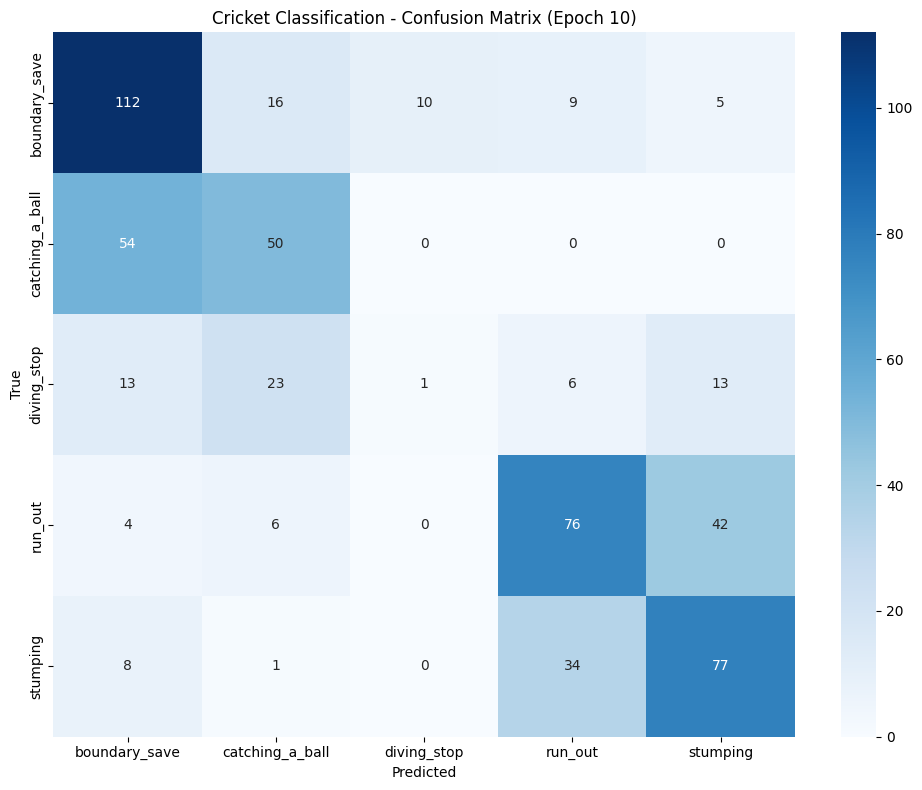

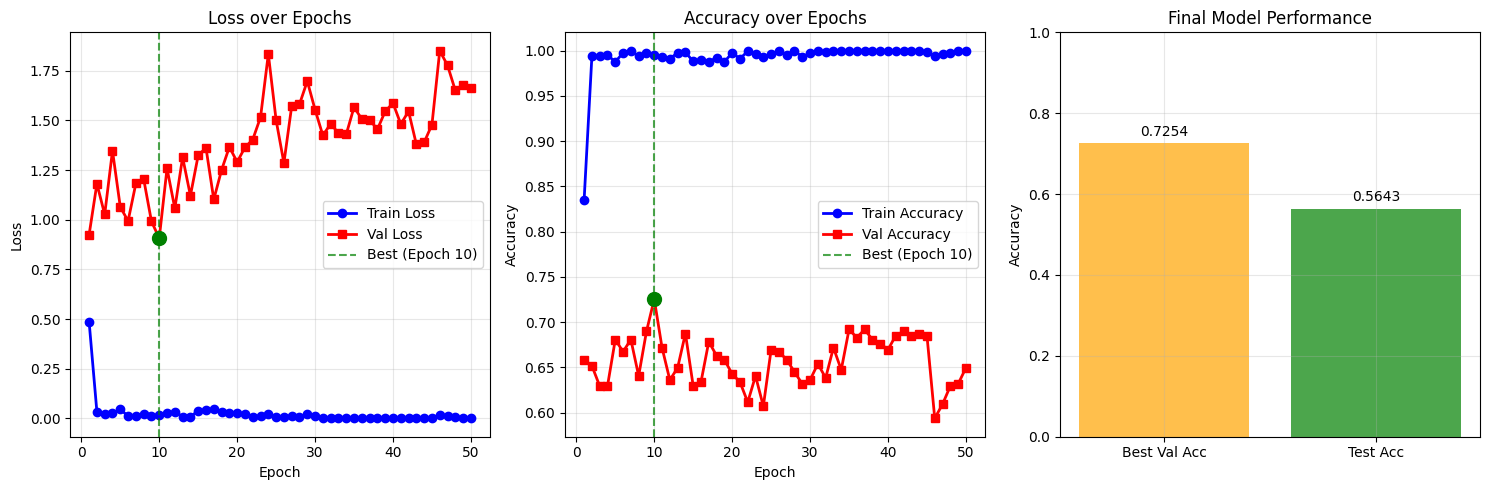


⏰ Final Timing Summary:
│ Total Training: 1654.55s (27.6 min)
│ Average per Epoch: 33.09s
│ Testing Time: 8.48s
│ Total Runtime: 1663.03s


In [9]:
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 3. Training Setup
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Lower LR for fine-tuning

print(f"\n📋 Training Configuration:")
print(f"│ Optimizer: Adam (lr={optimizer.param_groups[0]['lr']})")
print(f"│ Loss Function: CrossEntropyLoss")
print(f"│ Batch Size: 32")
print(f"│ Device: {device}")

# -----------------------------
# 4. Training Loop with Model Saving
# -----------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epoch_times = []
epochs = 50

# Initialize best model tracking (using val_loss for fine-tuning)
best_val_loss = float('inf')
best_model_state = None
best_epoch = 0
best_val_acc = 0.0

print(f"\n🚀 Starting Fine-tuning for {epochs} epochs...")
print("=" * 80)
total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()
    
    print(f"\n📈 Epoch {epoch+1}/{epochs}")
    print("-" * 50)
    
    # Training Phase
    print("🔄 Training Phase...")
    model.train()
    running_loss, correct, total = 0, 0, 0
    
    train_pbar = tqdm(train_loader, desc="Training", 
                     bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    train_phase_start = time.time()
    
    for batch_idx, (imgs, labels) in enumerate(train_pbar):
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        
        current_acc = correct / total
        train_pbar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.4f}',
            'Acc': f'{current_acc:.4f}'
        })
        
        if device.type == 'cuda' and batch_idx % 10 == 0:
            gpu_memory = torch.cuda.memory_allocated() / 1024**3
            train_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}',
                'GPU': f'{gpu_memory:.1f}GB'
            })
    
    train_phase_time = time.time() - train_phase_start
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"✅ Training completed in {train_phase_time:.2f}s")
    
    # Validation Phase
    print("🔍 Validation Phase...")
    model.eval()
    running_loss, correct, total = 0, 0, 0
    
    val_phase_start = time.time()
    val_pbar = tqdm(val_loader, desc="Validation", 
                   bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    with torch.no_grad():
        for batch_idx, (imgs, labels) in enumerate(val_pbar):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            current_acc = correct / total
            val_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}'
            })
    
    val_phase_time = time.time() - val_phase_start
    val_loss = running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"✅ Validation completed in {val_phase_time:.2f}s")
    
    # Check if this is the best model (using val_loss for fine-tuning)
    is_best = val_loss < best_val_loss
    if is_best:
        best_val_loss = val_loss
        best_val_acc = val_acc
        best_epoch = epoch + 1
        best_model_state = model.state_dict().copy()
        print(f"🌟 New best model found! Validation Loss: {val_loss:.4f}")
    
    # Epoch Summary
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    
    print(f"\n📊 Epoch {epoch+1} Summary:")
    print(f"│ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"│ Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.4f}")
    print(f"│ Train Time: {train_phase_time:.2f}s | Val Time: {val_phase_time:.2f}s")
    print(f"│ Total Epoch Time: {epoch_time:.2f}s")
    print(f"│ Best Val Loss: {best_val_loss:.4f} (Epoch {best_epoch})")
    
    if device.type == 'cuda':
        print(f"│ GPU Memory: {torch.cuda.memory_allocated()/1024**3:.1f}GB / {torch.cuda.memory_reserved()/1024**3:.1f}GB")
    
    print("=" * 80)

total_training_time = time.time() - total_start_time

# Save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'best_cricket_resnet50_pretrained.pth')
    print(f"\n💾 Best model saved as 'best_cricket_resnet50.pth'")
    print(f"📊 Best model stats:")
    print(f"│ Best Epoch: {best_epoch}")
    print(f"│ Best Val Loss: {best_val_loss:.4f}")
    print(f"│ Best Val Acc: {best_val_acc:.4f}")

# Save training history
history_data = {
    'epoch': list(range(1, epochs+1)),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs,
    'epoch_time': epoch_times
}

history_df = pd.DataFrame(history_data)
history_df.to_csv('cricket_training_history_resnet50_pretrained.csv', index=False)
print("\n💾 Training history saved to 'cricket_training_history_resnet50_pretrained.csv'")

print(f"\n🎉 Fine-tuning Complete!")
print(f"Total Training Time: {total_training_time:.2f}s ({total_training_time/60:.1f} minutes)")
print(f"Average Epoch Time: {np.mean(epoch_times):.2f}s")

# -----------------------------
# 5. Load Best Model and Test
# -----------------------------
print(f"\n🧪 Loading Best Model for Testing...")
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"✅ Best model from epoch {best_epoch} loaded successfully!")

test_start_time = time.time()
y_true, y_pred = [], []
model.eval()
test_pbar = tqdm(test_loader, desc="Testing", 
                bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')

with torch.no_grad():
    for imgs, labels in test_pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_time = time.time() - test_start_time
test_accuracy = accuracy_score(y_true, y_pred)

print(f"✅ Testing completed in {test_time:.2f}s")
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))
print(f"🎯 Test Accuracy: {test_accuracy:.4f}")

# Performance Summary
print(f"\n📊 Cricket Classification Performance:")
print(f"│ Best Validation Loss: {best_val_loss:.4f} (Epoch {best_epoch})")
print(f"│ Best Validation Acc:  {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"│ Final Test Accuracy:  {test_accuracy:.4f}")
print(f"│ Val-Test Gap:         {abs(best_val_acc - test_accuracy):.4f}")

print(f"\n💾 Files saved:")
print(f"│ best_cricket_resnet50.pth - Best model weights")
print(f"│ cricket_training_history.csv - Training metrics")

# -----------------------------
# 6. Visualizations
# -----------------------------
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Cricket Classification - Confusion Matrix (Epoch {best_epoch})")
plt.tight_layout()
plt.show()

# Training Curves
plt.figure(figsize=(15, 5))

# Loss Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label="Train Loss", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_losses, 'r-', label="Val Loss", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_loss], color='green', s=100, zorder=5)
plt.legend()
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

# Accuracy Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, epochs+1), train_accs, 'b-', label="Train Accuracy", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_accs, 'r-', label="Val Accuracy", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_acc], color='green', s=100, zorder=5)
plt.legend()
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)

# Final Performance
plt.subplot(1, 3, 3)
metrics = ['Best Val Acc', 'Test Acc']
values = [best_val_acc, test_accuracy]
colors = ['orange', 'green']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title("Final Model Performance")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, 
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Final Summary
print(f"\n⏰ Final Timing Summary:")
print(f"│ Total Training: {total_training_time:.2f}s ({total_training_time/60:.1f} min)")
print(f"│ Average per Epoch: {np.mean(epoch_times):.2f}s")
print(f"│ Testing Time: {test_time:.2f}s")
print(f"│ Total Runtime: {total_training_time + test_time:.2f}s")